<a href="https://colab.research.google.com/github/nvancha/DS_Hackathon-/blob/main/GROUP_11_M6_Fairness_Credit_Scoring_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GROUP - 11**
#*Nipuna Vancha*
#*Amina Seini*
#**BLUF**

To a technical manager:

The RandomForestClassifier is a machine learning model that was built using the AI Fairness 360 toolkit of IBM. The model was trained on a dataset that was pre-processed to address bias using techniques such as SMOTE (Synthetic Minority Over-sampling Technique) and standardization. The features were captured and the model was fit to the data using the RandomForestClassifier algorithm. The most important features were month, credit_amount, status=a11 and status=a14 having highest importance of 0.057, 0.059, 0.059 and 0.075 respectively based on both RandomForest model and Shapely value analysis.

We interpreted the relationship between each feature and the target as follows:

'month': As the duration of the loan (in months) increases, the probability of being a good credit risk seems to increase until a certain point and then starts to decrease again. This might indicate that customers who take loans with a moderate duration are more likely to be good credit risks compared to those with very short or very long loan durations.

'credit_amount': The relationship between the credit amount and the target appears to be non-linear. The probability of being a good credit risk seems to increase as the credit amount increases up to a certain point, and then it starts to decrease. This may suggest that customers with moderate loan amounts are more likely to be good credit risks compared to those with very low or very high loan amounts.

'status=A11': This feature is a binary indicator representing whether the customer's checking account status is 'A11' or not. The probability of being a good credit risk is higher for customers with a 'status=A11' (0.667) than for those without it (0.428). This suggests that the checking account status 'A11' is positively correlated with the likelihood of being a good credit risk.

'status=A14': Similarly, this feature is a binary indicator representing whether the customer's checking account status is 'A14' or not. However, in this case, the probability of being a good credit risk is higher for customers without 'status=A14' (0.613) than for those with it (0.331). This indicates that the checking account status 'A14' is negatively correlated with the likelihood of being a good credit risk.

Our decision tree surrogate model (for 2 levels of tree depth) then used features other than the most important ones identified using Shapley analysis. Through this, we were able to identify status, credit_history and skill_level as being the most important features. It is worthwhile to note that in this decision tree analysis, Skill level was a variable that suggested high feature importance but did not show up in the original feature importance analysis using randomforest model. This is something that can be explored further.

We created an ICE plot  to visualize the dependence of the prediction on a feature for each instance separately, resulting in one line per instance, compared to one line overall in partial dependence plots. Through this, we were able to identify status, credit_history and installment plans as being the most important features. It is worthwhile to note that there were no significant drops in the slope of the graph.


To a non-technical manager:

We built a machine learning model to predict whether a customer is a good credit risk or not. We used a toolkit to address bias in the data and trained the model using an algorithm called RandomForestClassifier. We found that the most important features for predicting credit risk were the loan duration, the loan amount, and the customer's checking account status. We also looked at a decision tree model and found that the most important features were the customer's credit history, skill level, and checking account status. We created a plot to visualize the relationship between the loan duration and credit risk, and found that there was a sweet spot where customers with moderate loan durations were more likely to be good credit risks. Overall, our models suggest that checking account status is an important factor for predicting credit risk.



#**M6 Hackathon Overview**
In this M6 hackathon we are working with a model built to address bias in an advertising dataset. The model was built using the [AI Fairness 360 toolkit](https://) of IBM. The classifier object is

#**M6 Hackathon Checklist**

For the M6 hackathon, using the data described in class, explain to both a technical and a non-technical manager how the RandomForestClassifier built on bias-mitigated data works.

# Detecting and mitigating age bias on credit decisions

The goal of this tutorial is to introduce the basic functionality of AI Fairness 360 to an interested developer who may not have a background in bias detection and mitigation.

### Biases and Machine Learning
A machine learning model makes predictions of an outcome for a particular instance. (Given an instance of a loan application, predict if the applicant will repay the loan.) The model makes these predictions based on a training dataset, where many other instances (other loan applications) and actual outcomes (whether they repaid) are provided. Thus, a machine learning algorithm will attempt to find patterns, or generalizations, in the training dataset to use when a prediction for a new instance is needed. (For example, one pattern it might discover is "if a person has salary > USD 40K and has outstanding debt < USD 5, they will repay the loan".) In many domains this technique, called supervised machine learning, has worked very well.

However, sometimes the patterns that are found may not be desirable or may even be illegal. For example, a loan repay model may determine that age plays a significant role in the prediction of repayment because the training dataset happened to have better repayment for one age group than for another. This raises two problems: 1) the training dataset may not be representative of the true population of people of all age groups, and 2) even if it is representative, it is illegal to base any decision on a applicant's age, regardless of whether this is a good prediction based on historical data.

AI Fairness 360 is designed to help address this problem with _fairness metrics_ and _bias mitigators_.  Fairness metrics can be used to check for bias in machine learning workflows.  Bias mitigators can be used to overcome bias in the workflow to produce a more fair outcome.

The loan scenario describes an intuitive example of illegal bias. However, not all undesirable bias in machine learning is illegal it may also exist in more subtle ways.  For example, a loan company may want a diverse portfolio of customers across all income levels, and thus, will deem it undesirable if they are making more loans to high income levels over low income levels.  Although this is not illegal or unethical, it is undesirable for the company's strategy.

As these two examples illustrate, a bias detection and/or mitigation toolkit needs to be tailored to the particular bias of interest.  More specifically, it needs to know the attribute or attributes, called _protected attributes_, that are of interest: race is one example of a _protected attribute_ and age is a second.

### The Machine Learning Workflow
To understand how bias can enter a machine learning model, we first review the basics of how a model is created in a supervised machine learning process.  



![image](https://github.com/Trusted-AI/AIF360/blob/master/examples/images/Complex_NoProc_V3.jpg?raw=1)








First, the process starts with a _training dataset_, which contains a sequence of instances, where each instance has two components: the features and the correct prediction for those features.  Next, a machine learning algorithm is trained on this training dataset to produce a machine learning model.  This generated model can be used to make a prediction when given a new instance.  A second dataset with features and correct predictions, called a _test dataset_, is used to assess the accuracy of the model.
Since this test dataset is the same format as the training dataset, a set of instances of features and prediction pairs, often these two datasets derive from the same initial dataset.  A random partitioning algorithm is used to split the initial dataset into training and test datasets.

Bias can enter the system in any of the three steps above.  The training data set may be biased in that its outcomes may be biased towards particular kinds of instances.  The algorithm that creates the model may be biased in that it may generate models that are weighted towards particular features in the input. The test data set may be biased in that it has expectations on correct answers that may be biased.  These three points in the machine learning process represent points for testing and mitigating bias.  In AI Fairness 360 codebase, we call these points _pre-processing_, _in-processing_, and _post-processing_.

### AI Fairness 360
We are now ready to utilize AI Fairness 360 (`aif360`) to detect and mitigate bias.  We will use the German credit dataset, splitting it into a training and test dataset.  We will look for bias in the creation of a machine learning model to predict if an applicant should be given credit based on various features from a typical credit application.  The protected attribute will be "Age", with "1" (older than or equal to 25) and "0" (younger than 25) being the values for the privileged and unprivileged groups, respectively.
For this first tutorial, we will check for bias in the initial training data, mitigate the bias, and recheck.  More sophisticated machine learning workflows are given in the author tutorials and demo notebooks in the codebase.

Here are the steps involved
#### Step 1: Write import statements
#### Step 2: Set bias detection options, load dataset, and split between train and test
#### Step 3: Compute fairness metric on original training dataset
#### Step 4: Mitigate bias by transforming the original dataset
#### Step 5: Compute fairness metric on transformed training dataset

### Step 1 Import Statements
As with any python program, the first step will be to import the necessary packages.  Below we import several components from the `aif360` package.  We import the GermanDataset, metrics to check for bias, and classes related to the algorithm we will use to mitigate bias.

In [ ]:
!pip install --quiet aif360[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Load all necessary packages
import sys
sys.path.insert(1, "../")

import numpy as np
np.random.seed(0)

from aif360.datasets import GermanDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing

from IPython.display import Markdown, display

### Step 2 Load dataset, specifying protected attribute, and split dataset into train and test
In Step 2 we load the initial dataset, setting the protected attribute to be age.  We then splits the original dataset into training and testing datasets.  Although we will use only  the training dataset in this tutorial, a normal workflow would also use a test dataset for assessing the efficacy (accuracy, fairness, etc.) during the development of a machine learning model.  Finally, we set two variables (to be used in Step 3) for the privileged (1) and unprivileged (0) values for the age attribute.  These are key inputs for detecting and mitigating bias, which will be Step 3 and Step 4.  

In [ ]:
%pip install wget
import wget, os

output_directory = os.path.join("/usr/local/lib/python3.10/dist-packages/aif360/data/raw/german")

german_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
german_doc_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc"

german_data = wget.download(german_data_url, out=output_directory)
german_doc = wget.download(german_doc_url, out=output_directory)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=3cc107c670803a0da3626219fa1140ebf2f5f415b33afe06eabe171eb1a9e051
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
dataset_orig = GermanDataset(
    protected_attribute_names=['age'],           # this dataset also contains protected
                                                 # attribute for "sex" which we do not
                                                 # consider in this evaluation
    privileged_classes=[lambda x: x >= 25],      # age >=25 is considered privileged
    features_to_drop=['personal_status', 'sex'] # ignore sex-related attributes
)

dataset_orig_train, dataset_orig_test = dataset_orig.split([0.7], shuffle=True)
.
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

### Step 3 Compute fairness metric on original training dataset
Now that we've identified the protected attribute 'age' and defined privileged and unprivileged values, we can use aif360 to detect bias in the dataset.  One simple test is to compare the percentage of favorable results for the privileged and unprivileged groups, subtracting the former percentage from the latter.   A negative value indicates less favorable outcomes for the unprivileged groups.  This is implemented in the method called mean_difference on the BinaryLabelDatasetMetric class.  The code below performs this check and displays the output, showing that the difference is -0.169905.

In [ ]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig_train,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.169905


### Step 4 Mitigate bias by transforming the original dataset
The previous step showed that the privileged group was getting 17% more positive outcomes in the training dataset.   Since this is not desirable, we are going to try to mitigate this bias in the training dataset.  As stated above, this is called _pre-processing_ mitigation because it happens before the creation of the model.  

AI Fairness 360 implements several pre-processing mitigation algorithms.  We will choose the Reweighing algorithm [1], which is implemented in the `Reweighing` class in the `aif360.algorithms.preprocessing` package.  This algorithm will transform the dataset to have more equity in positive outcomes on the protected attribute for the privileged and unprivileged groups.

We then call the fit and transform methods to perform the transformation, producing a newly transformed training dataset (dataset_transf_train).

`[1] F. Kamiran and T. Calders,  "Data Preprocessing Techniques for Classification without Discrimination," Knowledge and Information Systems, 2012.`

In [ ]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
dataset_transf_train = RW.fit_transform(dataset_orig_train)

### Step 5 Compute fairness metric on transformed dataset
Now that we have a transformed dataset, we can check how effective it was in removing bias by using the same metric we used for the original training dataset in Step 3.  Once again, we use the function mean_difference in the BinaryLabelDatasetMetric class.   We see the mitigation step was very effective, the difference in mean outcomes is now 0.0.  So we went from a 17% advantage for the privileged group to equality in terms of mean outcome.

In [ ]:
metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train,
                                               unprivileged_groups=unprivileged_groups,
                                               privileged_groups=privileged_groups)
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_train.mean_difference())

#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.000000


### Summary
The purpose of this tutorial is to give a new user to bias detection and mitigation a gentle introduction to some of the functionality of AI Fairness 360.  A more complete use case would take the next step and see how the transformed dataset impacts the accuracy and fairness of a trained model.  This is implemented in the demo notebook in the examples directory of toolkit, called demo_reweighing_preproc.ipynb.  I highly encourage readers to view that notebook as it is  generalization and extension of this simple tutorial.

There are many metrics one can use to detect the presence of bias. AI Fairness 360 provides many of them for your use. Since it is not clear which of these metrics to use, we also provide some guidance. Likewise, there are many different bias mitigation algorithms one can employ, many of which are in AI Fairness 360. Other tutorials will demonstrate the use of some of these metrics and mitigations algorithms.

As mentioned earlier, both fairness metrics and mitigation algorithms can be performed at various stages of the machine learning pipeline.  We recommend checking for bias as often as possible, using as many metrics are relevant for the application domain.  We also recommend incorporating bias detection in an automated continuous integration pipeline to ensure bias awareness as a software project evolves.

#**M6 Models**

In [ ]:
#Libraries
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import imblearn
print("imblearn version: ", imblearn.__version__)
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

!pip install shap
import shap



imblearn version:  0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier

from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

In [ ]:
# Get Pandas DataFrame from AIF360 object dataset_transf_train

df = pd.DataFrame(dataset_transf_train.features, columns=dataset_transf_train.feature_names)

# # add the target and protected attributes columns
df['target'] = dataset_transf_train.labels.ravel()
df['age'] = dataset_transf_train.protected_attributes[:, 0]

# print the dataframe
print(df.head())

   month  credit_amount  investment_as_income_percentage  residence_since  \
0   36.0         3959.0                              4.0              3.0   
1    9.0         3577.0                              1.0              2.0   
2   18.0         2515.0                              3.0              4.0   
3   12.0         1995.0                              4.0              1.0   
4   60.0        10366.0                              2.0              4.0   

   age  number_of_credits  people_liable_for  status=A11  status=A12  \
0  1.0                1.0                1.0         1.0         0.0   
1  1.0                1.0                2.0         0.0         0.0   
2  1.0                1.0                1.0         0.0         0.0   
3  1.0                1.0                1.0         0.0         1.0   
4  1.0                1.0                1.0         0.0         0.0   

   status=A13  ...  housing=A153  skill_level=A171  skill_level=A172  \
0         0.0  ...           0.0

In [ ]:
# May [1,2] to [0,1] in target
df['target'] = df['target'].map({1.0: 0.0, 2.0: 1.0})

In [ ]:
# Split data into predictors X and target y
X = df.drop('target',axis=1)
y = df['target']
cols=X.columns

In [ ]:
# Create holdout sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training Data Predictors\n',X_train.head(), '\nTraining Data Target\n',y_train.head(),'\n')
print('Test Data Predictors\n',X_test.head(), '\nTest Data Target\n',y_test.head())


Training Data Predictors
      month  credit_amount  investment_as_income_percentage  residence_since  \
357   18.0         4153.0                              2.0              3.0   
649   24.0         1199.0                              4.0              4.0   
291    9.0         3074.0                              1.0              2.0   
420   60.0         6527.0                              4.0              4.0   
177   24.0          947.0                              4.0              3.0   

     age  number_of_credits  people_liable_for  status=A11  status=A12  \
357  1.0                1.0                1.0         1.0         0.0   
649  1.0                2.0                1.0         1.0         0.0   
291  1.0                2.0                2.0         0.0         0.0   
420  1.0                1.0                2.0         0.0         0.0   
177  1.0                1.0                2.0         0.0         0.0   

     status=A13  ...  housing=A152  housing=A153  skil

In [ ]:
# SMOTE (oversampling)
sm = SMOTE(random_state=12346)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

print("Shape before SMOTE: ", X_train.shape, y_train.shape, "\n")
print("Shape after SMOTE: ", X_train_SMOTE.shape, y_train_SMOTE.shape, "\n")

Shape before SMOTE:  (490, 57) (490,) 

Shape after SMOTE:  (688, 57) (688,) 



In [ ]:
# Standardization of predictor
stdsc = StandardScaler()
X_train_SMOTE_std = stdsc.fit_transform(X_train_SMOTE)
X_test_std = stdsc.transform(X_test)             # transform uses the parameters from scaling the training data to transform our test data
print('Mean and Standard Deviation of sepal_width in Training Data: ',X_train_SMOTE_std[:,0].mean(), '  ',X_train_SMOTE_std[:,0].std())
print('Mean and Standard Deviation of sepal width in Test Data: ',X_test_std[:,0].mean(), '  ',X_test_std[:,0].std())

X_train_SMOTE_std=pd.DataFrame(X_train_SMOTE_std)
y_train_SMOTE_std=pd.DataFrame(y_train_SMOTE_std)
X_test_std=pd.DataFrame(X_test_std)
y_test=pd.DataFrame(y_test)

Mean and Standard Deviation of sepal_width in Training Data:  3.0982968129074136e-17    0.9999999999999999
Mean and Standard Deviation of sepal width in Test Data:  0.010875602923212966    1.0669560999416257


##*RandomForestClassifier Built on Original Data*


In [ ]:
# Create RF Classifier

# Spawn instance of random forest classifier, parametrized according to the gridseracgh in the classification notebook
clf = RandomForestClassifier()
# Capture feature names
X_train_SMOTE_std.columns = cols
y_train.columns=['target']

# Fit Random Forest model
clf.fit(X_train_SMOTE_std,np.ravel(y_train_SMOTE))

# Capture predictions for training set using Random Forest classifier
y_train_pred = clf.predict(X_train_SMOTE_std)
y_train_pred = pd.DataFrame(y_train_pred)

# Capture predictions for test set using Random Forest classifier
y_test_pred = clf.predict(X_test_std)
y_test_pred = pd.DataFrame(y_test_pred)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


###*Feature Importance Using Random Forest Model*


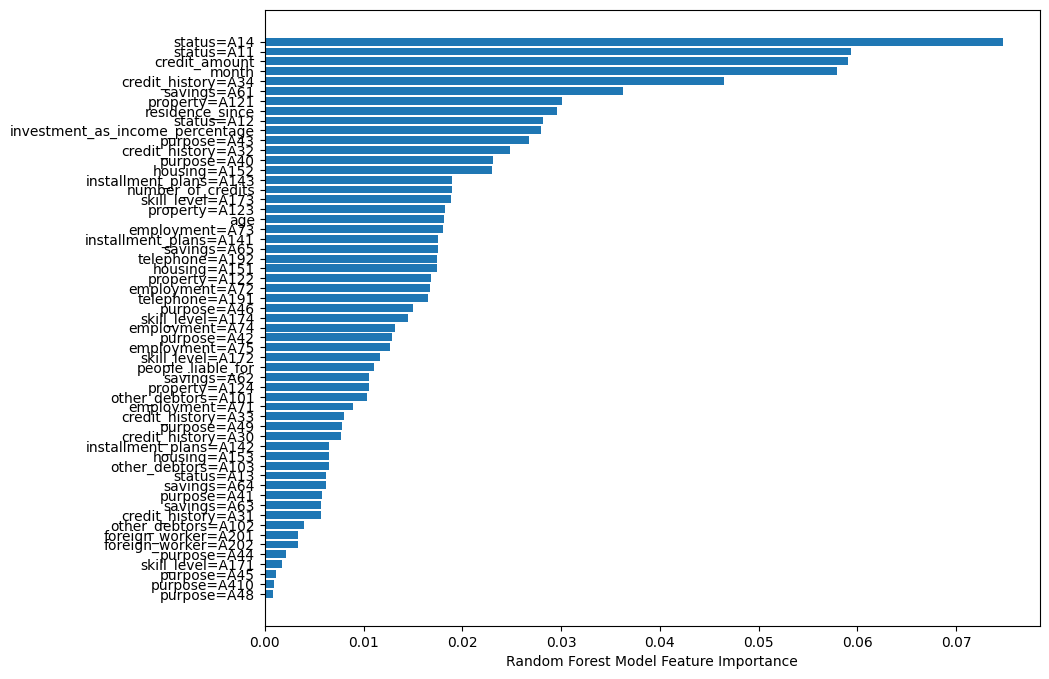

Top 4 most important features:
1. month (importance: 0.05794979910947313)
2. credit_amount (importance: 0.05900340273908645)
3. status=A11 (importance: 0.059331899204427246)
4. status=A14 (importance: 0.07471068184711444)


In [ ]:
# Fit Random Forest model, recover feature importances
clf.fit(X_train_SMOTE_std, np.ravel(y_train_SMOTE))
sorted_idx = clf.feature_importances_.argsort()

# Plot feature importances
plt.barh(cols[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Model Feature Importance")
plt.show()

# Get top 4 most important features
top_features = 4
top_idx = sorted_idx[-top_features:]
top_feature_names = cols[top_idx]

# Print top 4 most important features
print(f"Top {top_features} most important features:")
for i, feature in enumerate(top_feature_names):
    print(f"{i + 1}. {feature} (importance: {clf.feature_importances_[top_idx[i]]})")


###*Relationship of important feature values to target*


In [ ]:
#print("Feature names in X_train_SMOTE_std DataFrame:")
#print(X_train_SMOTE_std.columns)
X_train_SMOTE_std.columns = cols
print("Feature names in cols:")
print(cols)

X_train_SMOTE_std.columns = cols

print("Feature names in X_train_SMOTE_std DataFrame:")
print(X_train_SMOTE_std.columns)


Feature names in cols:
Index(['month', 'credit_amount', 'investment_as_income_percentage',
       'residence_since', 'age', 'number_of_credits', 'people_liable_for',
       'status=A11', 'status=A12', 'status=A13', 'status=A14',
       'credit_history=A30', 'credit_history=A31', 'credit_history=A32',
       'credit_history=A33', 'credit_history=A34', 'purpose=A40',
       'purpose=A41', 'purpose=A410', 'purpose=A42', 'purpose=A43',
       'purpose=A44', 'purpose=A45', 'purpose=A46', 'purpose=A48',
       'purpose=A49', 'savings=A61', 'savings=A62', 'savings=A63',
       'savings=A64', 'savings=A65', 'employment=A71', 'employment=A72',
       'employment=A73', 'employment=A74', 'employment=A75',
       'other_debtors=A101', 'other_debtors=A102', 'other_debtors=A103',
       'property=A121', 'property=A122', 'property=A123', 'property=A124',
       'installment_plans=A141', 'installment_plans=A142',
       'installment_plans=A143', 'housing=A151', 'housing=A152',
       'housing=A153', '

In [ ]:
import pandas as pd

# Assign column names to the standardized data
X_train_SMOTE_std.columns = cols

# Combine feature and target data for analysis
X_y_train = pd.concat([X_train_SMOTE_std, y_train_SMOTE], axis=1)


# Function to calculate average target value for each quantile of a feature
def analyze_feature_target_relationship(df, feature, target, num_quantiles=10):
    df_quantiles = df.groupby(pd.qcut(df[feature], num_quantiles, duplicates='drop')).mean()
    return df_quantiles[[feature, target]]


# Analyze the relationship of the top 4 most important features to the target
for i, feature in enumerate(top_feature_names):
    print(f"Relationship of feature '{feature}' to target:")
    relationship_df = analyze_feature_target_relationship(X_y_train, feature, 'target')
    print(relationship_df)
    print("\n")


Relationship of feature 'month' to target:
                     month    target
month                               
(-1.531, -1.089] -1.247507  0.243590
(-1.089, -0.825] -0.859471  0.384615
(-0.825, -0.426] -0.595427  0.567164
(-0.426, -0.201] -0.307533  0.565217
(-0.201, 0.231]   0.150678  0.496970
(0.231, 0.759]    0.588097  0.634615
(0.759, 1.305]    1.174961  0.689655
(1.305, 3.4]      2.124052  0.623188


Relationship of feature 'credit_amount' to target:
                               credit_amount    target
credit_amount                                         
(-1.0179999999999998, -0.819]      -0.891867  0.492754
(-0.819, -0.666]                   -0.731056  0.521739
(-0.666, -0.61]                    -0.638261  0.642857
(-0.61, -0.499]                    -0.567648  0.328358
(-0.499, -0.336]                   -0.407994  0.521739
(-0.336, -0.15]                    -0.245113  0.463768
(-0.15, 0.114]                     -0.027640  0.426471
(0.114, 0.429]                      0.2

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


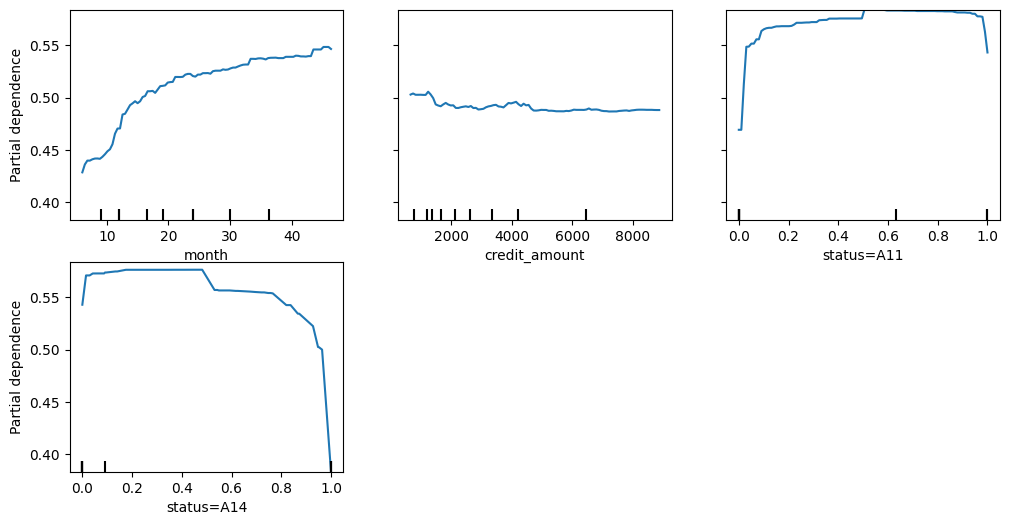

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence

# Fit the Random Forest model again, but this time using the non-standardized data
clf.fit(X_train_SMOTE, np.ravel(y_train_SMOTE))

# Get the indices of the top features
top_feature_indices = [cols.get_loc(feature) for feature in top_feature_names]

# Create the partial dependence plots
fig, ax = plt.subplots(figsize=(12, 6))
plot_partial_dependence(clf, X_train_SMOTE, top_feature_indices, feature_names=cols, n_jobs=-1, ax=ax)
plt.show()


###*Decision tree*

In [ ]:
print("X_train_SMOTE_std shape:", X_train_SMOTE_std.shape)
print("y_train_SMOTE_std shape:", y_train_SMOTE_std.shape)


X_train_SMOTE_std shape: (688, 57)
y_train_SMOTE_std shape: (490, 1)


X_train_SMOTE shape: (688, 57)
y_train_SMOTE shape: (688,)


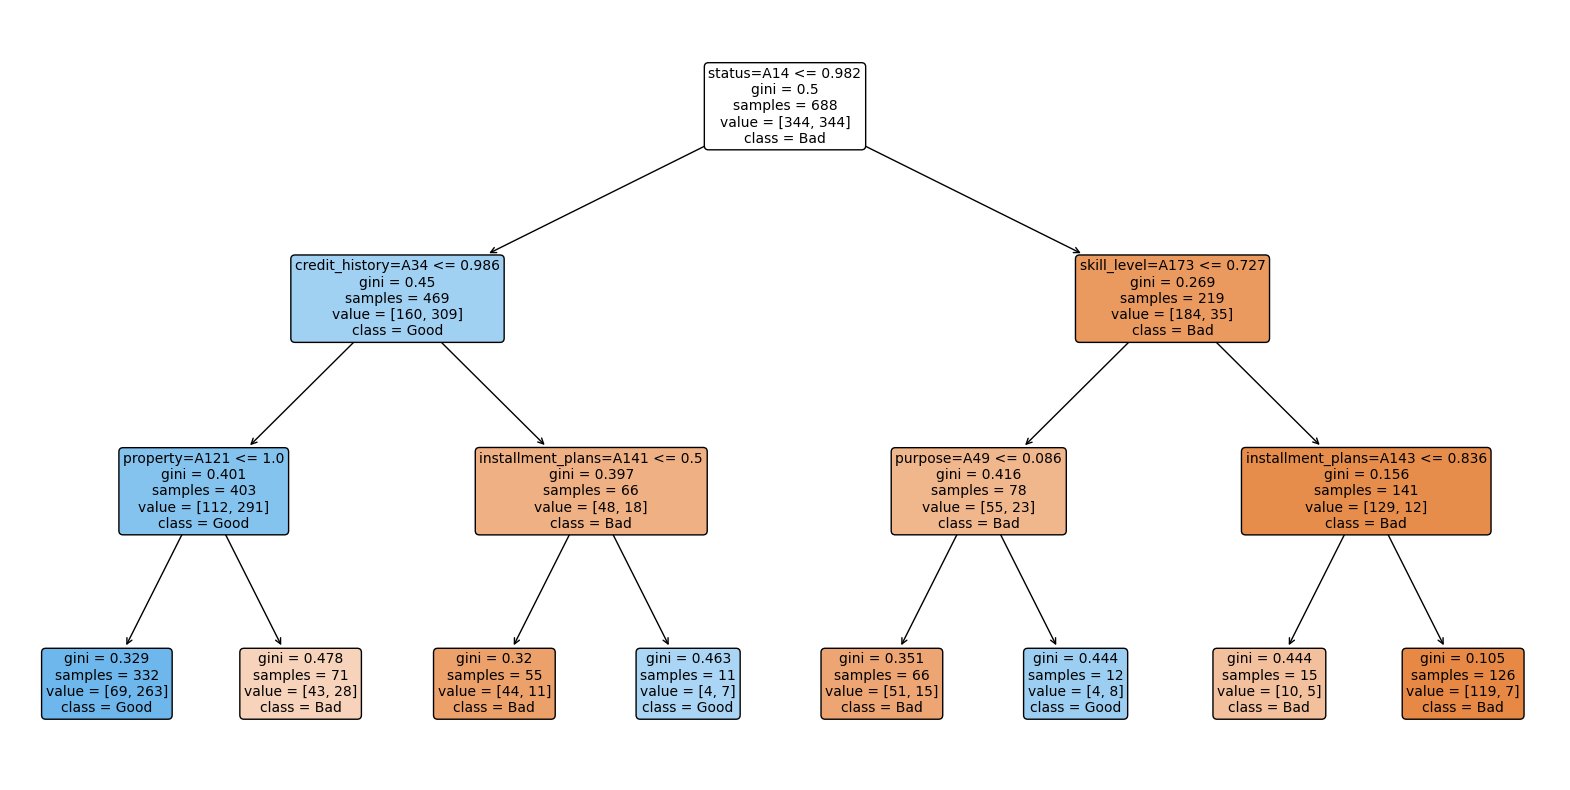

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train_SMOTE, np.ravel(y_train_SMOTE))

# Train the model with the SMOTE-transformed data
dt_clf.fit(X_train_SMOTE, np.ravel(y_train_SMOTE))

# Check the shapes of the training sets
print("X_train_SMOTE shape:", X_train_SMOTE.shape)
print("y_train_SMOTE shape:", y_train_SMOTE.shape)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=cols, class_names=["Bad", "Good"], filled=True, rounded=True, fontsize=10)
plt.show()


###*Shapey Values*

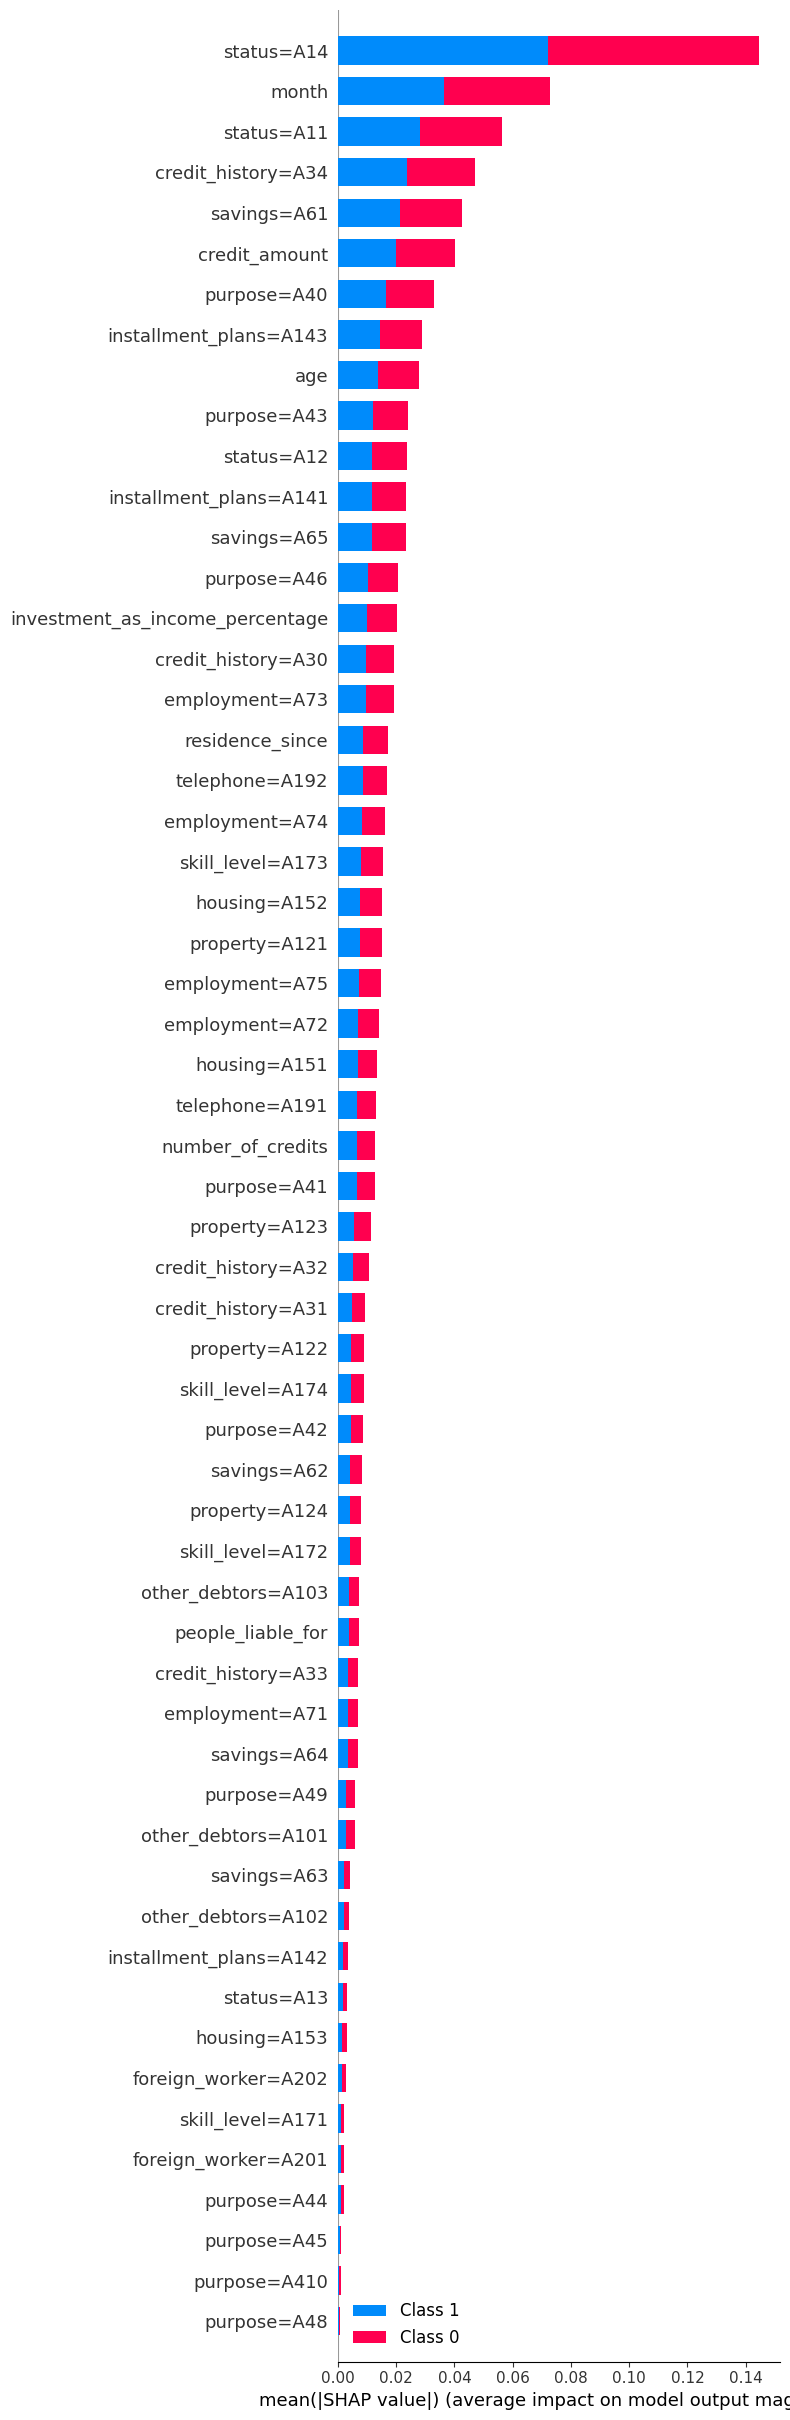

In [ ]:
import shap

# create RandomForestClassifier object
regr = RandomForestClassifier(n_estimators=100, random_state=0)
regr.fit(X_train_std, y_train)

# compute Shapley values using TreeExplainer
explainer = shap.TreeExplainer(regr)
shap_values = explainer.shap_values(X_train_std)

# get the top 4 most important features
result = permutation_importance(regr, X_train_std, y_train, n_repeats=10, random_state=0)
importances = result.importances_mean
indices = importances.argsort()[::-1]
top4 = X_train.columns[indices][:4]

# display Shapley values using summary plot
shap.summary_plot(shap_values, X_train_std, feature_names=X_train.columns, max_display=len(X_train.columns))


###*ICE graphs*

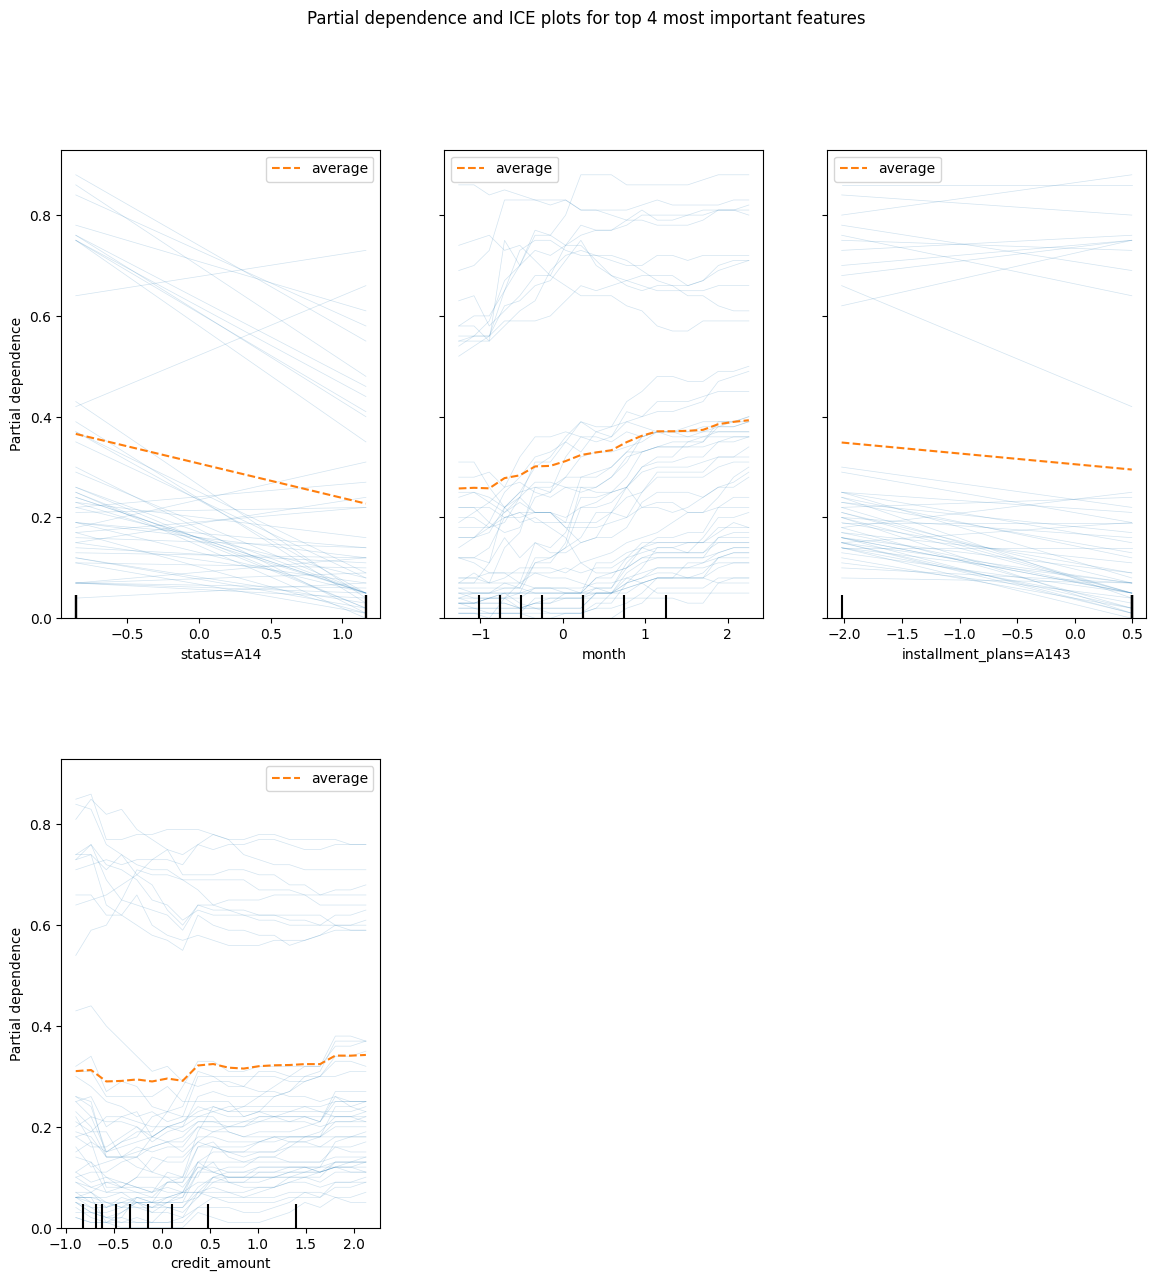

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay

# create RandomForestClassifier object
regr = RandomForestClassifier(n_estimators=100, random_state=0)
regr.fit(X_train_std, y_train)

# compute feature importances
result = permutation_importance(regr, X_train_std, y_train, n_repeats=10, random_state=0)
importances = result.importances_mean

# get the top 4 most important features
indices = importances.argsort()[::-1]
top4 = X_train.columns[indices][:4]

# create figure and axis objects
fig, ax = plt.subplots(figsize=(14, 14))

# create ICE plots using PartialDependenceDisplay class
display = PartialDependenceDisplay.from_estimator(
    regr,
    X_train_std,
    top4,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    ax=ax,
    feature_names=X_train.columns.tolist()
)

# set the title and adjust spacing
display.figure_.suptitle("Partial dependence and ICE plots for top 4 most important features")
display.figure_.subplots_adjust(hspace=0.3)
